<a href="https://colab.research.google.com/github/subodhsd/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_final_by_Subodh_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### The Features of The Dataset:



1. UserName-Encoded UserName of the use
2. ScreenName-Encoded ScreenName of the use
2. Location-The location of the tweet
3. Tweet At-Date of the tweet
4. Original Tweet-The text/content of the tweet
5. Sentiment-the sentiment of the tweet. It has five labels-Positive, Negative,  Neutral, Extremely Positive, Extremely Negative

In [ ]:
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization and graphical plotting
import numpy as np # for manipulation of multi-dimensional arrays and matrices
import seaborn as sns # for data visualization
import re # for regular expression matching operations 
import nltk # for Natural Language processing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split #sklearn-- for machine learning algorithms
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#loading the dataset
tweet_df=pd.read_csv('/content/drive/MyDrive/dat files in ml/capstone project/Data & Resources/Coronavirus Tweets.csv',encoding = 'latin')

In [ ]:
#Top five observation of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Information about different column of the Dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
columns=['Location','TweetAt','Sentiment']

In [ ]:
#unique value counts for above mentioned columns
for item in columns:
  value_count=tweet_df[item].value_counts().reset_index().rename(columns={'index': 'Unique Values', 'Location': 'Count'})
  print(f'\033[1mThe number of uniue values in {item} are\033 :\n\n {value_count}\n')



The number of uniue values in Location are :

                       Unique Values  Count
0                            London    540
1                     United States    528
2                   London, England    520
3                      New York, NY    395
4                    Washington, DC    373
...                             ...    ...
12215       Staffordshire Moorlands      1
12216                 Kithchener ON      1
12217                     Tulsa, Ok      1
12218  Watford, South Oxhey, Bushey      1
12219  i love you so much || he/him      1

[12220 rows x 2 columns]

The number of uniue values in TweetAt are :

    Unique Values  TweetAt
0     20-03-2020     3448
1     19-03-2020     3215
2     25-03-2020     2979
3     18-03-2020     2742
4     21-03-2020     2653
5     22-03-2020     2114
6     23-03-2020     2062
7     17-03-2020     1977
8     08-04-2020     1881
9     07-04-2020     1843
10    06-04-2020     1742
11    24-03-2020     1480
12    09-04-2020     147

##Deep Dive on tweets

In [ ]:
#Positive Tweet
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Positive']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Positive']['OriginalTweet'].tail(5))

1    advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order                                                                                    
2    Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P                                                                                                                                                                                              
3    My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
5    As news of the

In [ ]:
#Negative Tweets
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Negative']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Negative']['OriginalTweet'].tail(5))

9     For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona                            
24    @10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer                                        
26    In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn                                                                                             
28    Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker P

In [ ]:
#Neutral Tweets
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Neutral']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Neutral']['OriginalTweet'].tail(5))

0     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8                                                                                                                                                                     
7     Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ                                                                                                                                                       
10    All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9
16    ????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ????

In [ ]:
#Extremely Positive
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Extremely Positive']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Extremely Positive']['OriginalTweet'].tail(5))

11    Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.                                                         
12    #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh                       
18    Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a statement. ÂToday this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3         
22    We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help yo

In [ ]:
#Extremely negative
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Extremely Negative']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Extremely Negative']['OriginalTweet'].tail(5))

4     Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n
20    with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale                                                                       
27    This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂm doing ???? No panic. https://t.co/Lg7HVMZglZ                                          
29    @7Seals

In [ ]:
#create new variable number of characters which stores length of each tweet
tweet_df['number of characters']=tweet_df['OriginalTweet'].apply(lambda x: len(x))

In [ ]:
#maximum character count of tweet
count_max=tweet_df['number of characters'].max()
count_max

355

In [ ]:
tweet_df.loc[25160,:]

UserName                28959                                                                                                                                                                                                                                                                                                                                                                                               
ScreenName              73911                                                                                                                                                                                                                                                                                                                                                                                               
Location                Melbourne, Australia                                                                                                                                  

In [ ]:
#minimun character count of tweet
count_min=tweet_df['number of characters'].min()
count_min

11

In [ ]:
#tweet with minumum charecter
pd.set_option('display.max_colwidth', -1)  
tweet_df[tweet_df['number of characters']==count_min]['OriginalTweet']

9776     Be like Bob
16872    Cartoon for
20467    Omg y all  
35526          amp  
Name: OriginalTweet, dtype: object

In [ ]:
tweet_df.loc[9776,:],tweet_df.loc[16872,:],tweet_df.loc[20467,:],tweet_df.loc[35526,:]

(UserName                13575                   
 ScreenName              58527                   
 Location                Scotland, United Kingdom
 TweetAt                 20-03-2020              
 OriginalTweet           Be like Bob             
 Sentiment               Positive                
 number of characters    11                      
 Name: 9776, dtype: object, UserName                20671      
 ScreenName              65623      
 Location                ?? ?       
 TweetAt                 23-03-2020 
 OriginalTweet           Cartoon for
 Sentiment               Neutral    
 number of characters    11         
 Name: 16872, dtype: object, UserName                24266          
 ScreenName              69218          
 Location                Coastal Elite ?
 TweetAt                 25-03-2020     
 OriginalTweet           Omg y all      
 Sentiment               Neutral        
 number of characters    11             
 Name: 20467, dtype: object, UserName            

In [ ]:
#describtion of character length column
tweet_df['number of characters'].describe()

count    41157.000000
mean     204.200160  
std      68.655129   
min      11.000000   
25%      151.000000  
50%      215.000000  
75%      259.000000  
max      355.000000  
Name: number of characters, dtype: float64

## Check Null values

In [ ]:
#null values of each column
tweet_df.isnull().sum()

UserName                0   
ScreenName              0   
Location                8590
TweetAt                 0   
OriginalTweet           0   
Sentiment               0   
number of characters    0   
dtype: int64

##Top 20 location with highest number of tweets

In [ ]:
tweet_location=tweet_df['Location'].value_counts().reset_index().rename(columns = {'index':'Location','Location':'Number_of_Tweets'})

In [ ]:
tweet_location=tweet_location.sort_values(by='Number_of_Tweets',ascending=False).head(20)
tweet_location

,Location,Number_of_Tweets
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


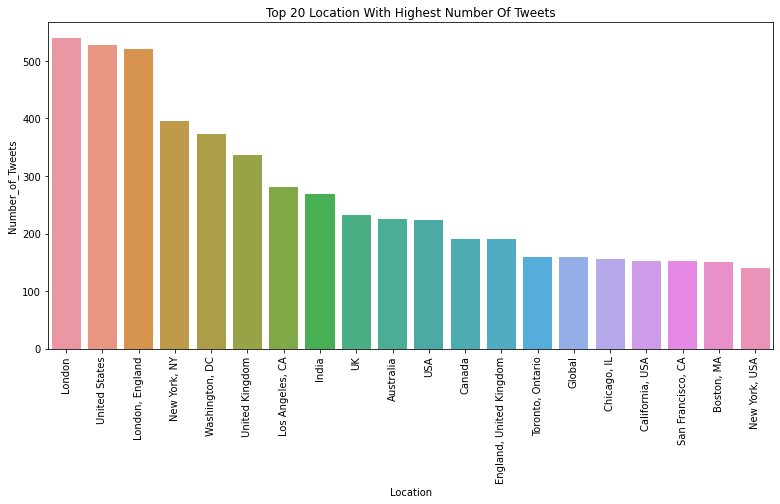

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(data=tweet_location, x="Location",y="Number_of_Tweets");
plt.xticks(rotation=90);
plt.title('Top 20 Location With Highest Number Of Tweets'); 

### Observation


*   Graph shows top 20 locations with highest of tweets.



## Top 20 Date With Highest Number Of Tweets

In [ ]:
#top 20 date with heighest number of tweets
tweet_date=tweet_df['TweetAt'].value_counts().reset_index().rename(columns = {'index':'Date_Of_Tweet','TweetAt':'Number_of_Tweets'})
tweet_date=tweet_date.sort_values(by='Number_of_Tweets',ascending=False).head(20)


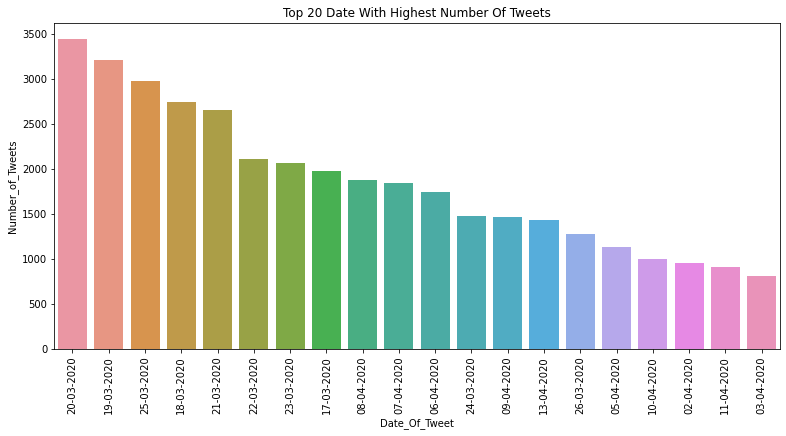

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(data=tweet_date, x="Date_Of_Tweet",y="Number_of_Tweets");
plt.xticks(rotation=90);
plt.title('Top 20 Date With Highest Number Of Tweets');

### Observation


*   Graph shows top 20 date with highest of tweets.

## Sentiment Distribution

In [ ]:
tweet_sentiment=tweet_df['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Number_of_Tweets'})
tweet_sentiment=tweet_sentiment.sort_values(by='Number_of_Tweets',ascending=False)

In [ ]:
tweet_sentiment

,Sentiment,Number_of_Tweets
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


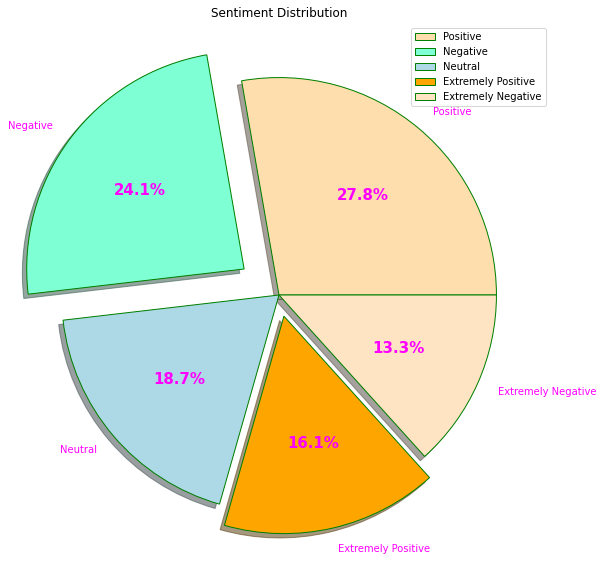

In [ ]:
#pie chart for percentage distribution of sentiment of tweets
explode = (0, 0.2, 0,0.1,0)
labels = 'Positive', 'Negative', 'Neutral','Extremely Positive','Extremely Negative'
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts=ax.pie(data=tweet_sentiment,x='Number_of_Tweets',labels=labels,autopct='%1.1f%%',shadow=True,explode=explode,colors=['navajowhite','aquamarine','lightblue','orange','bisque'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
plt.legend( loc=1)
ax.set_title("Sentiment Distribution");

### Observation


*   Pie chart for percentage distribution of sentiment of tweets. Positive sentiment tweets have the largest share.



## HashTag Analysis

In [ ]:
# function for hashtags collection 
def hashtag(x):
    ''' This function collects all
      the hashtags from the tweets '''
    
    hashtags_list = []
    
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        for item in ht:
          hashtags_list.append(item)
    
    return hashtags_list

In [ ]:
total_hashtags=hashtag(tweet_df['OriginalTweet'])

In [ ]:
total_hashtags_df=pd.DataFrame({"Hashtags":total_hashtags})
total_hashtags_df

,Hashtags
0,COVID19france
1,COVID_19
2,COVID19
3,coronavirus
4,confinement
...,...
81146,coronavirus
81147,toiletpaper
81148,coronavirus
81149,COVID19


In [ ]:
#number of total hashtags
len(total_hashtags_df)

81151

In [ ]:
#unique hash tags
total_hashtags_df.nunique()


Hashtags    18367
dtype: int64

In [ ]:
#printing all unique hashtags
with np.printoptions(threshold=np.inf):
    print(total_hashtags_df['Hashtags'].unique())

['COVID19france' 'COVID_19' 'COVID19' 'coronavirus' 'confinement'
 'Confinementotal' 'ConfinementGeneral' 'CoronavirusFrance'
 'restezchezvous' 'StayAtHome' 'Covid_19' 'Rebel' 'toiletpapercrisis'
 'covid_19' 'govindia' 'IndiaFightsCorona' 'manila' 'lockdown' 'covid2019'
 'Philippines' 'horningsea' 'CoronaVirus' 'covid19' 'COVID2019' 'Trials'
 'Monthly' 'Yearly' 'Prices' 'Subscriptions' 'bestiptv' 'iptv' 'Service'
 'Iptv' 'iptvdeals' 'Cheap' 'ipTV' 'Football' 'HD' 'Movies' 'Adult'
 'Cinema' 'hotmovies' 'iptvnew' 'iptv2020' 'ipTv' '18Movies' 'consumer'
 'tracker' 'CovidNYC' 'Coronavirus' 'StockUp' 'BreakingNews' 'Breaking'
 'CoronavirusOutbreak' 'COVID' 'Collapse' 'BrickAndMortar' 'jlmco'
 'jlmcobrand' 'coronapocolypse' 'shoponline' 'economy' 'onlineshopping'
 'stayhome' 'houston' 'nofood' 'Notoiletpaper' 'NoHandShakes'
 'nohandsanitizer' 'pandemic' 'totallockdown' 'COVID2019usa' 'walmart'
 'QuarantineLife' 'IMadeThisUp' 'FakeNews' 'CoronaVirusSA'
 'peoplearelosingtheirminds' 'StopTheMad

In [ ]:
#top 50 hashtags
top_hashtags=total_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,12954
1,COVID19,3364
2,Covid_19,2589
3,Coronavirus,2333
4,COVID2019,1634
5,toiletpaper,1410
6,COVID,1284
7,covid19,1127
8,CoronaCrisis,734
9,CoronaVirus,645


Text(0.5, 1.0, 'Top 50 hashtags')

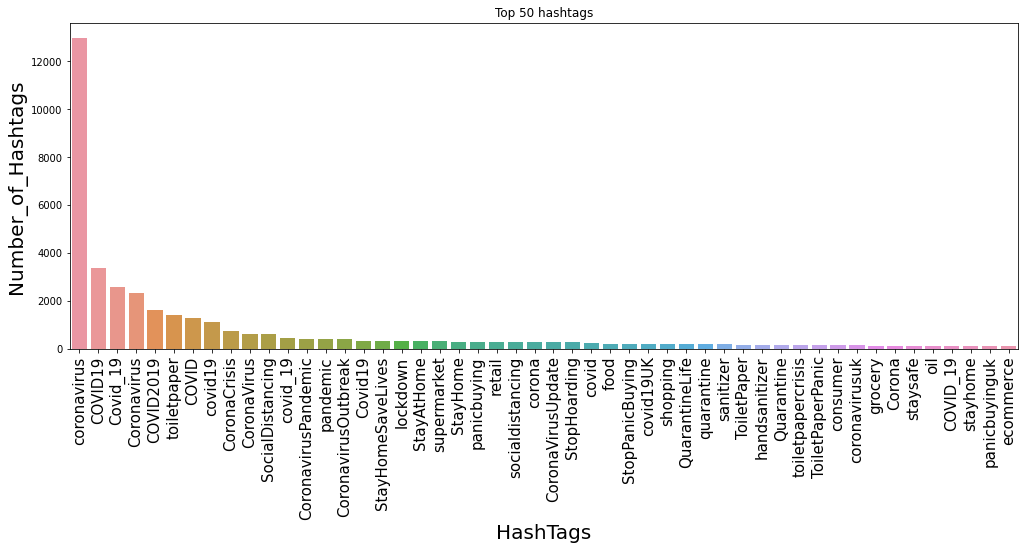

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 hashtags")

### Observation


1.   Graph shows top 50 hashtags. coronavirus is the top hashtags with a count of 12954.

